In [0]:
!pip install alpha_vantage

  Created wheel for alpha-vantage: filename=alpha_vantage-2.1.2-cp36-none-any.whl size=14690 sha256=382f2f32a765f6e2c70d58e2bed6ae6a293190c06dcba7a11883d981fca00d80
  Stored in directory: /root/.cache/pip/wheels/bb/22/da/426cbebbe36cf3c0fd433d279f670cadfa27cc3343303cdf36
Successfully built alpha-vantage


In [0]:
!pip install stocker

  Created wheel for pytrends: filename=pytrends-4.7.2-cp36-none-any.whl size=14260 sha256=b7c822233f5e7c83d5477cad745cf58ab70e6c93888cc74172414574d831db29
  Stored in directory: /root/.cache/pip/wheels/64/ae/af/51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends


In [0]:
!pip install preprocessing

     |████████████████████████████████| 358kB 5.1MB/s 
     |████████████████████████████████| 1.4MB 62.6MB/s 
     |████████████████████████████████| 1.2MB 51.5MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-cp36-none-any.whl size=1367709 sha256=e7ee68239d21becf4a858e44cbe29a95fb908003e9721217e8489152c9b0b4b7
  Stored in directory: /root/.cache/pip/wheels/36/f1/5c/f667347d86a3a534ba4c0127eed4389f929916e3ec88bb461a
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [0]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [0]:
import math

In [0]:
#import preprocessing
from sklearn import preprocessing

In [0]:
import stocker
#from stocker import Stocker

Using TensorFlow backend.


In [0]:
import datetime

In [0]:
api_key = 'B6MOR128S6URKDZ0'

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2019-12-13 16:00:00  74.3100  74.3200  74.2900   74.2900    54277.0
2019-12-13 15:59:00  74.2900  74.3300  74.2900   74.3200    47568.0
2019-12-13 15:58:00  74.2300  74.2900  74.2300   74.2900    24800.0
2019-12-13 15:57:00  74.2250  74.2400  74.2250   74.2400     7914.0
2019-12-13 15:56:00  74.2200  74.2300  74.2000   74.2250    35263.0
...                      ...      ...      ...       ...        ...
2019-12-09 09:35:00  73.2700  73.2700  73.2500   73.2600     4900.0
2019-12-09 09:34:00  73.2700  73.3000  73.2700   73.2700    11460.0
2019-12-09 09:33:00  73.2300  73.2900  73.2300   73.2600    12960.0
2019-12-09 09:32:00  73.3000  73.3200  73.2300   73.2500     9993.0
2019-12-09 09:31:00  73.4031  73.4706  73.3105   73.3131   101592.0

[1922 rows x 5 columns]


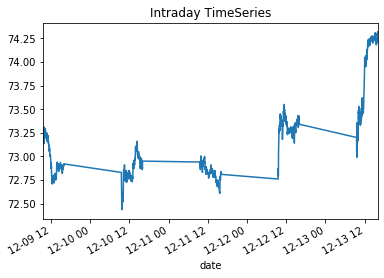

In [0]:
ts = TimeSeries(key=api_key,output_format='pandas')
data, meta_data = ts.get_intraday(symbol='TSE:TD',interval='1min', outputsize='full')
print(data)
data['4. close'].plot()
plt.title('Intraday TimeSeries')
plt.show()

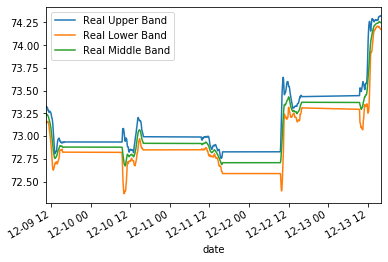

In [0]:
ti = TechIndicators(key='B6MOR128S6URKDZ0',output_format='pandas')
data1, meta_data = ti.get_bbands(symbol='TSE:TD',interval='1min', time_period=60)
data1.plot()
plt.show()

Two key measurements: Rolling Mean and Return Rate:

In [0]:
close_px = data['4. close']
mavg = close_px.rolling(window=100).mean()

In [0]:
print(mavg)

date
2019-12-13 16:00:00          NaN
2019-12-13 15:59:00          NaN
2019-12-13 15:58:00          NaN
2019-12-13 15:57:00          NaN
2019-12-13 15:56:00          NaN
                         ...    
2019-12-09 09:35:00    73.217250
2019-12-09 09:34:00    73.218650
2019-12-09 09:33:00    73.219900
2019-12-09 09:32:00    73.220900
2019-12-09 09:31:00    73.222531
Name: 4. close, Length: 1922, dtype: float64


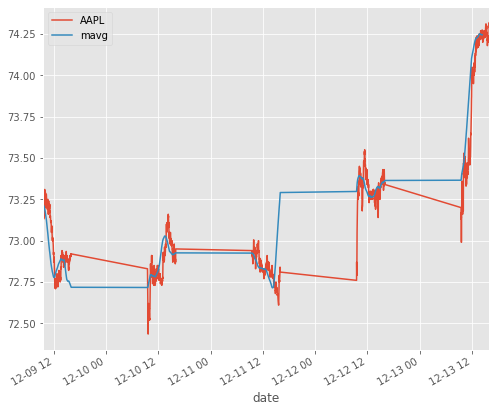

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

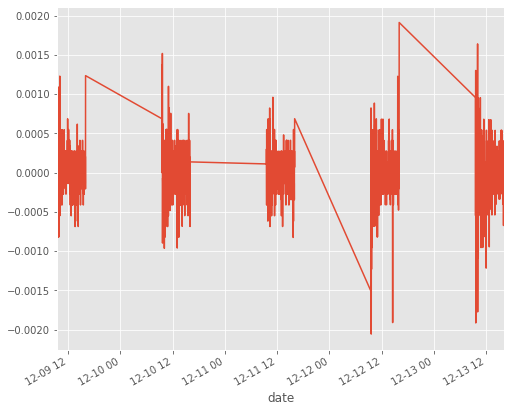

In [0]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [0]:
#closing = data['4. close']

In [0]:
percentage_change = close_px.pct_change()
print(percentage_change)

date
2019-12-13 16:00:00         NaN
2019-12-13 15:59:00    0.000404
2019-12-13 15:58:00   -0.000404
2019-12-13 15:57:00   -0.000673
2019-12-13 15:56:00   -0.000202
                         ...   
2019-12-09 09:35:00    0.000137
2019-12-09 09:34:00    0.000137
2019-12-09 09:33:00   -0.000136
2019-12-09 09:32:00   -0.000137
2019-12-09 09:31:00    0.000861
Name: 4. close, Length: 1922, dtype: float64


In [0]:
dfreg = data.loc[:,['4. close','Volume']]
dfreg['HL_PCT'] = (data['2. high'] - data['3. low']) / data['4. close'] * 100.0
dfreg['PCT_change'] = (data['4. close'] - data['1. open']) / data['1. open'] * 100.0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [0]:
dfreg

,4. close,Volume,HL_PCT,PCT_change
date,,,,
2019-12-13 16:00:00,74.2900,NaN,0.040382,-0.026914
2019-12-13 15:59:00,74.3200,NaN,0.053821,0.040382
2019-12-13 15:58:00,74.2900,NaN,0.080765,0.080830
2019-12-13 15:57:00,74.2400,NaN,0.020205,0.020209
2019-12-13 15:56:00,74.2250,NaN,0.040418,0.006737
...,...,...,...,...
2019-12-09 09:35:00,73.2600,NaN,0.027300,-0.013648
2019-12-09 09:34:00,73.2700,NaN,0.040944,0.000000
2019-12-09 09:33:00,73.2600,NaN,0.081900,0.040967


In [0]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the 4. Close
forecast_col = '4. close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [0]:
last_one = percentage_change[-1]

In [0]:
if abs(last_one) > 0.0004:
    print(last_one)
    print("Change seen")
else: 
    print("No change")

0.0008614334470991025
Change seen


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [0]:
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(x_test)

In [0]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,73.150,73.267897
1,72.840,72.890614
2,73.280,73.191476
3,72.900,72.822287
4,73.720,73.911776
...,...,...
376,74.000,73.985739
377,73.350,73.272526
378,72.815,72.810685
379,74.250,74.240500


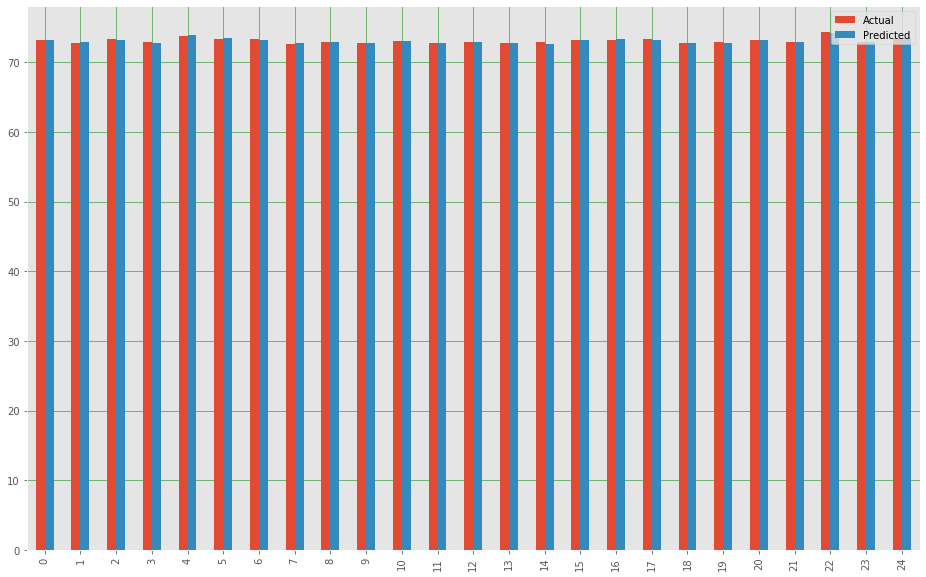

In [0]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

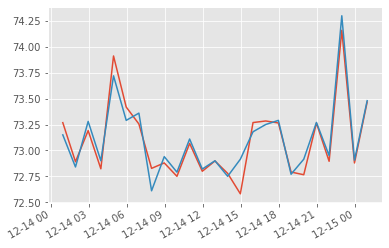

In [0]:
y1 = df1["Predicted"]
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(len(y1))]

y2 = df1["Actual"]
# plot
plt.plot(x,y1, x,y2)
plt.gcf().autofmt_xdate()
plt.show()

In [0]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(x_train, y_train)



Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [0]:
regressor1 = make_pipeline(PolynomialFeatures(2), Ridge())
regressor1.fit(x_train, y_train)
y_pred1 = regressor1.predict(x_test)

In [0]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
df2

,Actual,Predicted
0,73.150,73.245718
1,72.840,72.886715
2,73.280,73.177991
3,72.900,72.862349
4,73.720,73.885432
...,...,...
376,74.000,74.022977
377,73.350,73.257610
378,72.815,72.817974
379,74.250,74.302222


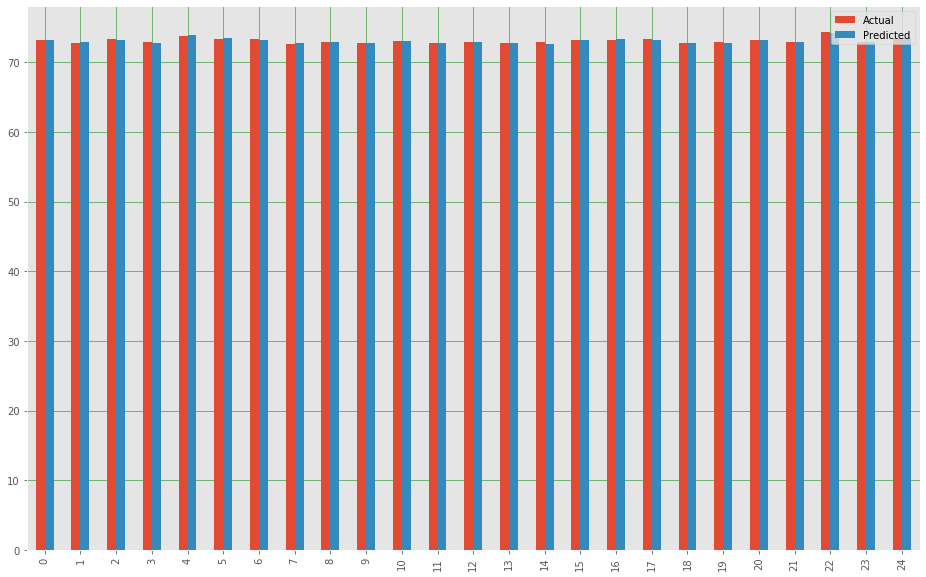

In [0]:
df2 = df.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

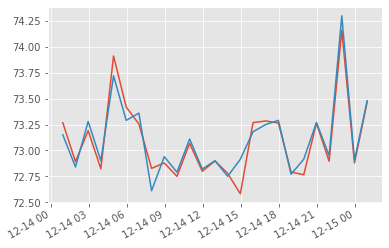

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime

# create data
y1 = df2["Predicted"]

x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(len(y1))]

y2 = df2["Actual"]
# plot
plt.plot(x,y1, x,y2)
plt.gcf().autofmt_xdate()
plt.show()

In [0]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(x_train, y_train)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [0]:
regressor2 = make_pipeline(PolynomialFeatures(3), Ridge())
regressor2.fit(x_train, y_train)
y_pred2 = regressor2.predict(x_test)

In [0]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})
df2

,Actual,Predicted
0,73.150,73.233755
1,72.840,72.888629
2,73.280,73.173369
3,72.900,72.863783
4,73.720,73.873818
...,...,...
376,74.000,74.028300
377,73.350,73.247577
378,72.815,72.819426
379,74.250,74.308379


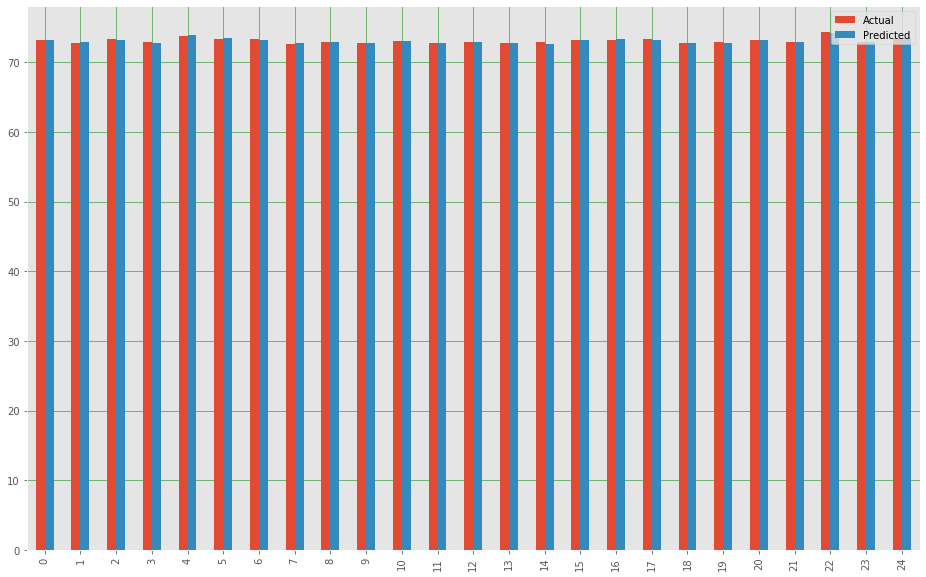

In [0]:
df3 = df.head(25)
df3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

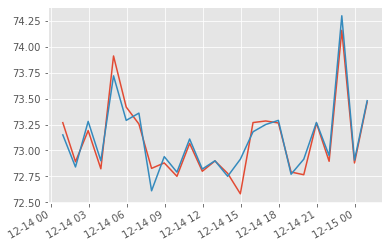

In [0]:
y1 = df3["Predicted"]
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(len(y1))]

y2 = df3["Actual"]
# plot
plt.plot(x,y1, x,y2)
plt.gcf().autofmt_xdate()
plt.show()

In [0]:
# KNN Regression
#from sklearn.neighbors import KNeighborsClassifier
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(x_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [0]:
#from sklearn.metrics import accuracy_score

In [0]:
clfknn.score(x_test, y_test)

0.9336921968868995

In [0]:
regressor4 = KNeighborsRegressor(n_neighbors=2)
regressor4.fit(x_train, y_train)
y_pred4 = regressor4.predict(x_test)

In [0]:
df4 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred4.flatten()})
df4

,Actual,Predicted
0,73.150,72.9750
1,72.840,72.8575
2,73.280,73.2650
3,72.900,72.8225
4,73.720,74.0425
...,...,...
376,74.000,74.1800
377,73.350,73.3300
378,72.815,72.6600
379,74.250,74.2450


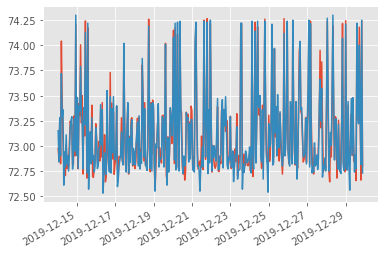

In [0]:
y1 = df4["Predicted"]
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(len(y1))]

y2 = df4["Actual"]
# plot
plt.plot(x,y1, x,y2)
plt.gcf().autofmt_xdate()
plt.show()

In [0]:
confidencereg = clfreg.score(x_test, y_test)
confidencepoly2 = clfpoly2.score(x_test,y_test)
confidencepoly3 = clfpoly3.score(x_test,y_test)
confidenceknn = clfknn.score(x_test, y_test)
print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)

0.9427978303607921
0.944848523189907
0.9303167768151395
0.9336921968868995
